<a href="https://colab.research.google.com/github/Khaydaraliev/Toshkent-uy-narxini-bashorat-qilish/blob/main/Toshkent_uy_narxlarini_bashorat_qilish.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Toshkent uy narxlarini bashorat qilish.**

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/anvarnarz/praktikum_datasets/main/housing_data_08-02-2021.csv')
df.head()

,location,district,rooms,size,level,max_levels,price
0,"город Ташкент, Юнусабадский район, Юнусабад 8-...",Юнусабадский,3,57,4,4,52000
1,"город Ташкент, Яккасарайский район, 1-й тупик ...",Яккасарайский,2,52,4,5,56000
2,"город Ташкент, Чиланзарский район, Чиланзар 2-...",Чиланзарский,2,42,4,4,37000
3,"город Ташкент, Чиланзарский район, Чиланзар 9-...",Чиланзарский,3,65,1,4,49500
4,"город Ташкент, Чиланзарский район, площадь Актепа",Чиланзарский,3,70,3,5,55000


# **Ma'lumotlarni o'rganamiz, analiz qilib va kerakli o'zgartrishlarni bajaramiz**


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7565 entries, 0 to 7564
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   location    7565 non-null   object
 1   district    7565 non-null   object
 2   rooms       7565 non-null   int64 
 3   size        7565 non-null   object
 4   level       7565 non-null   int64 
 5   max_levels  7565 non-null   int64 
 6   price       7565 non-null   object
dtypes: int64(3), object(4)
memory usage: 413.8+ KB


**Yuqoridagi m'lumotlardan 'size' (o'lcham) va 'price' (narx) ustunlari object ekanligini ko'rishimiz mumkin. Bu ustunlarni sonli ustunlarga o'zgartrish kerak.**

In [4]:
df_n = df
df_f = df_n.drop(['location', 'district'], axis=1)
for col in list(df_f.columns):
       if type(col) != int:
            df_n[col] = pd.to_numeric(df_f[col], errors='coerce')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7565 entries, 0 to 7564
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   location    7565 non-null   object 
 1   district    7565 non-null   object 
 2   rooms       7565 non-null   int64  
 3   size        7564 non-null   float64
 4   level       7565 non-null   int64  
 5   max_levels  7565 non-null   int64  
 6   price       7466 non-null   float64
dtypes: float64(2), int64(3), object(2)
memory usage: 413.8+ KB


# **O'zgartrilgan ma'lumotlarimizni tekshiramiz.**

In [6]:
df_n.isna().sum()

location       0
district       0
rooms          0
size           1
level          0
max_levels     0
price         99
dtype: int64

**'size' ustunida bir dona va 'price' ustunida 99 ta NaN qiymatlar mavjud ekanini ko'ramiz.
'size' ustunidagi bir dona NaN qiymatni tashlab yuboramiz.
'price' ustunidagi qiymatlarni o'rtacha qiymatga o'zgartrib chiqmiz.**

In [7]:
df_n['price'].fillna((df_n['price'].mean()), inplace=True)
df_n = df_n.dropna()
df_n.isna().sum()

location      0
district      0
rooms         0
size          0
level         0
max_levels    0
price         0
dtype: int64

**NaN qiymatlar ustida ishladik. Endi ma'lumotlarni o'rganib chiqamiz.**

In [8]:
print(f"max_size : {df_n['size'].max()}   min_size : {df_n['size'].min()}")

max_size : 70000.0   min_size : 1.0


**Uylarning o'lchamlari normal oraliqda emas minimal o'cham 1 kv.metr desak max o'lcham 70000 kv.metr, bu judaham katta. Demak ma'lumotlarimizni filtrlashimiz kerak.**

In [9]:
df_n[df_n['size']<15][df_n['rooms']>1]

<ipython-input-9-2010e26a03e4>:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_n[df_n['size']<15][df_n['rooms']>1]


,location,district,rooms,size,level,max_levels,price
796,"город Ташкент, Яккасарайский район, 1-й проезд...",Яккасарайский,2,5.0,1,4,50000.0
1588,"город Ташкент, Янгихаётский район, Yangi hayot...",Янгихаётский,5,1.0,6,9,45000.0
2147,"город Ташкент, Учтепинский район, Куксарой",Учтепинский,8,8.5,2,2,230000.0
2363,"город Ташкент, Мирабадский район, Nurli zamin ...",Мирабадский,4,3.0,1,1,50000.0
4053,"город Ташкент, Мирзо-Улугбекский район, Элобод",Мирзо-Улугбекский,2,4.0,1,3,26000.0
4337,"город Ташкент, Мирабадский район, Нукус",Мирабадский,3,5.0,4,5,46600.0
4690,"город Ташкент, Мирабадский район, 1-й проезд Х...",Мирабадский,5,3.8,2,2,90000.0
5496,"город Ташкент, Учтепинский район, Чиланзар 25-...",Учтепинский,2,1.0,2,5,35000.0


In [10]:
df_n[df_n['size']>250][df_n['rooms']<5]

<ipython-input-10-ff7efc8fbac9>:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_n[df_n['size']>250][df_n['rooms']<5]


,location,district,rooms,size,level,max_levels,price
981,"город Ташкент, Мирабадский район, Массив Куйлю...",Мирабадский,3,7359.0,2,4,46500.0
1553,"город Ташкент, Мирабадский район, Шахрисабз",Мирабадский,4,280.0,4,8,320000.0
1674,"город Ташкент, Яккасарайский район, Кичик Бешагач",Яккасарайский,3,265.0,1,9,198750.0
1693,"город Ташкент, Яшнободский район, Садыка Азимо...",Яшнободский,4,456.0,8,8,230000.0
2268,"город Ташкент, Мирзо-Улугбекский район, Ахмад ...",Мирзо-Улугбекский,1,24500.0,2,5,24500.0
2290,"город Ташкент, Юнусабадский район, м.Минор",Юнусабадский,4,279.0,1,3,150000.0
2547,"город Ташкент, Юнусабадский район, Киёт",Юнусабадский,3,70000.0,2,4,76000.0
2662,"город Ташкент, Учтепинский район, Учтепинский ...",Учтепинский,1,3448.0,5,5,25000.0
3089,"город Ташкент, Мирзо-Улугбекский район, Карасу...",Мирзо-Улугбекский,2,44000.0,3,4,44000.0
3779,"город Ташкент, Мирабадский район, М.Ойбек Габус",Мирабадский,4,282.0,7,8,305000.0


**Oddatda 1 xonali uylarnig minimal o'lchami 10 kv.metr atrofida bo'ladi. Lekin bizga berilgan ma'lumotlarda 10 kv.m dan kichik va xonalari 2 va undan ortiq bo'lgan uylar mavjud.
Bundan tashqari xonalar soni 4 tadan kam lekin o'lchami juda katta bo'lgan uylar ham bor. Bu ma'lumotlar bizning modelimizni noto'g'ri bashorat qilishiga tasir qilishi mumkin, shuning uchun bu ma'lumotlarni tashlab yuboramiz.**

In [11]:
df_n = df_n.drop(df_n[df_n['size']<15][df_n['rooms']>1].index)
df_n = df_n.drop(df_n[df_n['size']>250][df_n['rooms']<5].index)
df_n = df_n.drop(df_n[df_n['size']==2100].index)

<ipython-input-11-33ba6d0bd5f2>:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_n = df_n.drop(df_n[df_n['size']<15][df_n['rooms']>1].index)
<ipython-input-11-33ba6d0bd5f2>:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_n = df_n.drop(df_n[df_n['size']>250][df_n['rooms']<5].index)


In [12]:
print(f"max_price : {df_n['price'].max()}   min_price : {df_n['price'].min()}")

max_price : 52000000.0   min_price : 2.0


**Uylarning narxlaridaham ushbu nomutanosiblikni kuzatishimiz mumkin minimal narx 2 USD desak max narx 52000000 USD , buham juda katta. Ma'lumotlarimizni yana filtrlashimiz kerak.**

In [13]:
df_n[df_n['price']<7000][df_n['rooms']>1]

<ipython-input-13-3083a2b11fb6>:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_n[df_n['price']<7000][df_n['rooms']>1]


,location,district,rooms,size,level,max_levels,price
273,"город Ташкент, Яккасарайский район, Нукус",Яккасарайский,3,100.0,3,4,1000.0
1827,"город Ташкент, Мирзо-Улугбекский район, Хирмон...",Мирзо-Улугбекский,6,400.0,1,2,2000.0
3832,"город Ташкент, Яккасарайский район, Абдуллы Ка...",Яккасарайский,4,170.0,2,6,2000.0
4089,"город Ташкент, Шайхантахурский район, Актепа",Шайхантахурский,6,500.0,2,2,1800.0
5073,"город Ташкент, Сергелийский район, Srrgili 8uc...",Сергелийский,2,54.0,7,7,2864.0
5719,"город Ташкент, Шайхантахурский район, Караташ",Шайхантахурский,7,230.0,2,5,1000.0
7224,"город Ташкент, Учтепинский район, Чиланзар-11",Учтепинский,2,51.0,2,4,2.0


In [14]:
df_n[df_n['price']>400000][df_n['rooms']<9]

<ipython-input-14-d4a911344cc9>:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_n[df_n['price']>400000][df_n['rooms']<9]


,location,district,rooms,size,level,max_levels,price
330,"город Ташкент, Яшнободский район, 1-й переулок...",Яшнободский,2,68.0,5,8,1666000.0
741,"город Ташкент, Мирабадский район, Айбека (пр-т...",Мирабадский,5,300.0,3,8,425000.0
1744,"город Ташкент, Олмазорский район, Toshmi",Олмазорский,3,84.0,1,5,3780000.0
1874,"город Ташкент, Мирабадский район, Айбека (пр-т...",Мирабадский,5,300.0,3,8,425000.0
1999,"город Ташкент, Мирабадский район, Тараса Шевченко",Мирабадский,5,300.0,3,8,425000.0
3163,"город Ташкент, Мирзо-Улугбекский район, Кори Н...",Мирзо-Улугбекский,4,200.0,2,7,500000.0
3625,"город Ташкент, Мирабадский район, Тараса Шевченко",Мирабадский,5,225.0,5,8,530000.0
3656,"город Ташкент, Мирзо-Улугбекский район, Дархан",Мирзо-Улугбекский,5,336.0,8,9,504000.0
4926,"город Ташкент, Яккасарайский район, Кушбеги",Яккасарайский,2,64.0,1,5,420000.0
4935,"город Ташкент, Чиланзарский район, Катта козир...",Чиланзарский,1,28.0,3,4,644000.0


**Demak xonalar soni 2 va undan ortiq lekin narxlari juda past va xonalar soni 9-10 tadan kam lekin narxi juda yuqori bo'lgan real narxga to'g'ri kelmaydigan uylarni ko'rishimiz mumkin. Bu uylarni ham tashlab yuboramiz.**

In [15]:
df_n = df_n.drop(df_n[df_n['price']<7000][df_n['rooms']>1].index)
df_n = df_n.drop(df_n[df_n['price']>400000][df_n['rooms']<9].index)

<ipython-input-15-33cd6babf174>:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_n = df_n.drop(df_n[df_n['price']<7000][df_n['rooms']>1].index)
<ipython-input-15-33cd6babf174>:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_n = df_n.drop(df_n[df_n['price']>400000][df_n['rooms']<9].index)


# **Filtrlangan ma'lumotlarimizni endi Grafik usulda taxlil qilamiz.**

In [16]:
df_n = df_n.reset_index(drop=True)

df_1 = df_n.drop(['location', 'district'], axis=1)

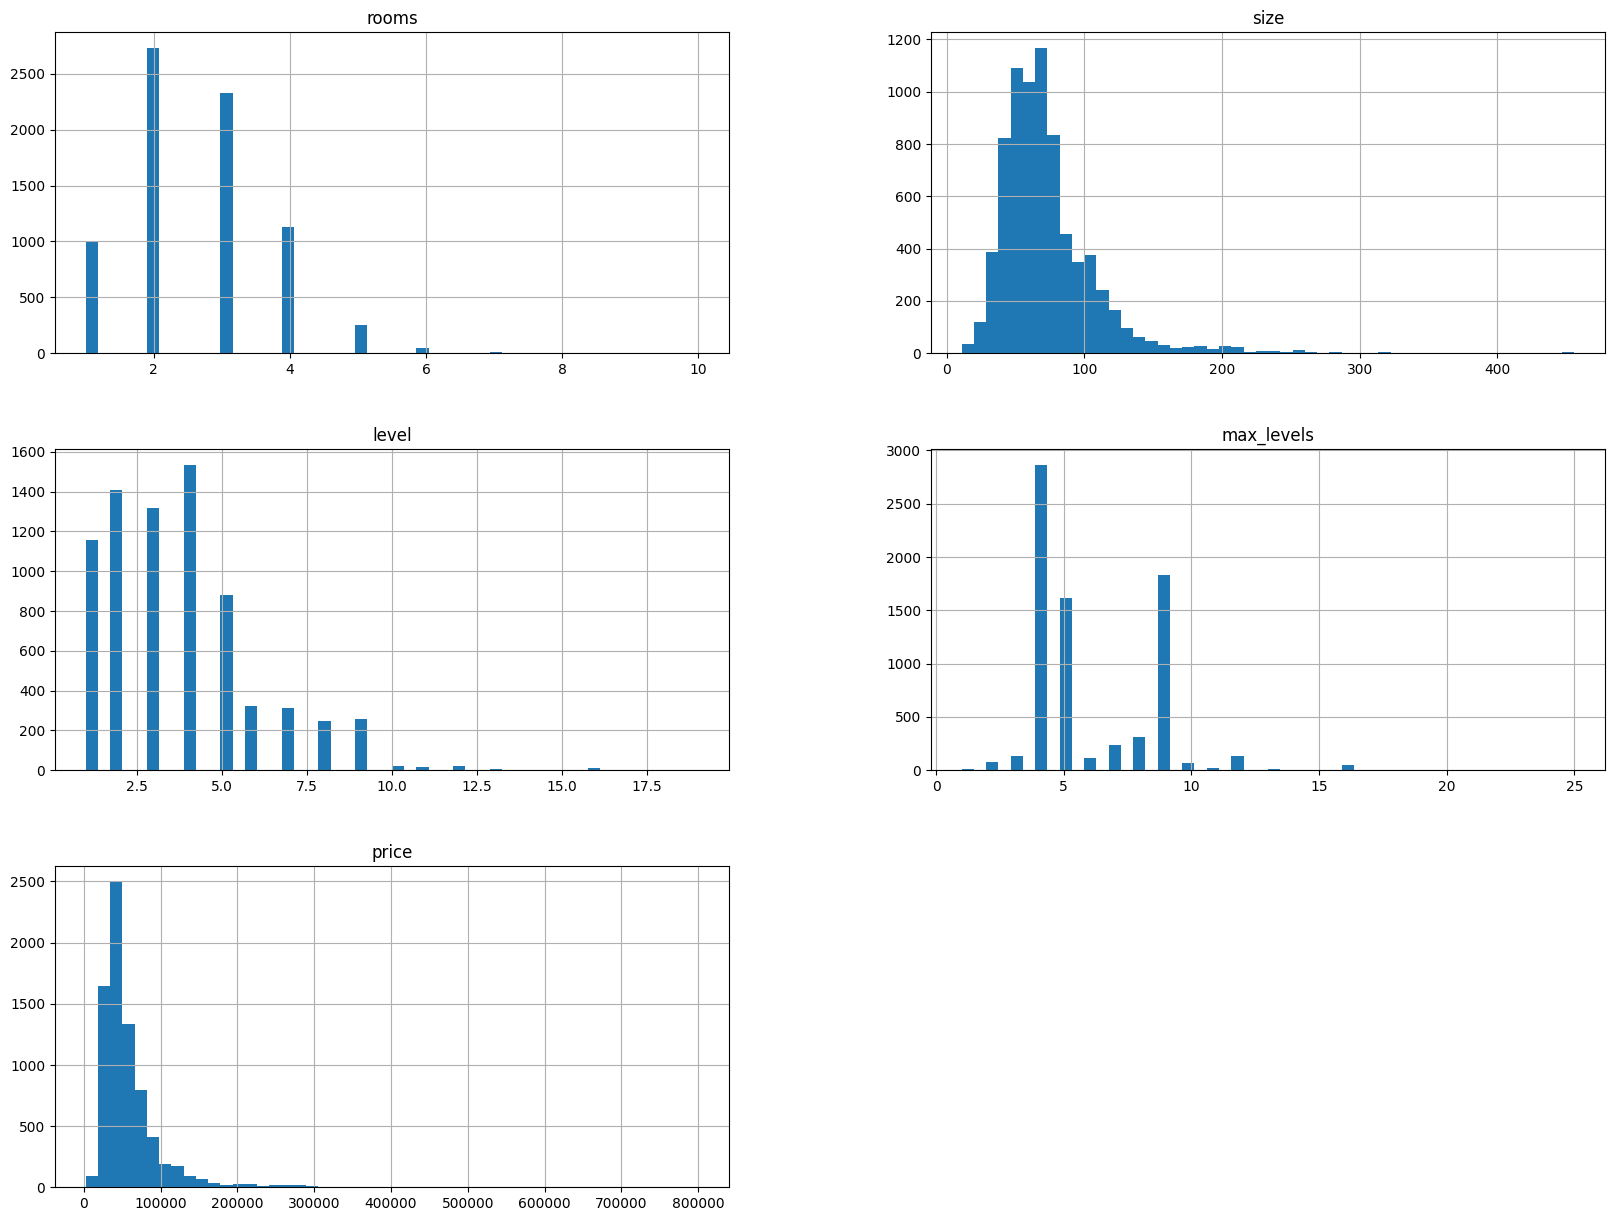

In [17]:
%matplotlib inline
df_1.hist(bins=50, figsize=(20,15))
plt.show()

# **UYLARNING NARXI BO'YICHA**

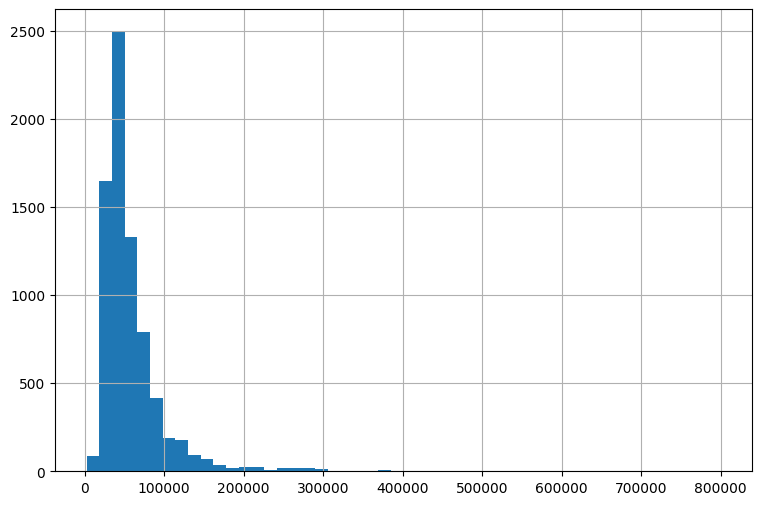

In [18]:
%matplotlib inline
df_p=df_n[['price']]
df_p['price'].hist(bins=50, figsize=(9,6))
plt.show()

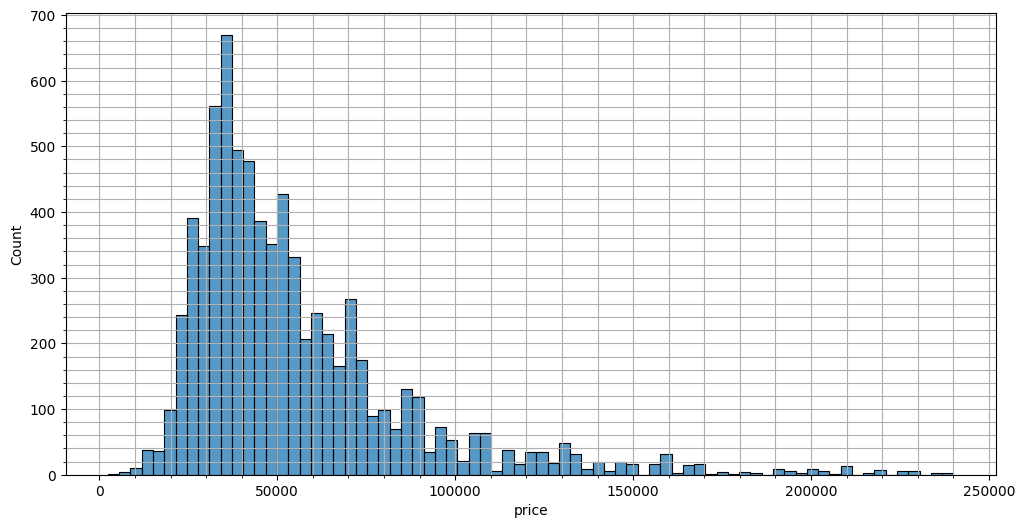

In [19]:
df_pf=df_n[df_n['price']<250000]
plt.figure(figsize=(12,6))
sns.histplot(data=df_pf, x='price')
plt.grid(which='both')
plt.minorticks_on()
plt.show()

**Bu grafikdan 80 % ga yaqin uylarning narxi 20000 - 100000 USD oralig'ida ekanligini ko'rishimiz mumkin.**

# **UYLARNING MAYDONI BO'YICHA**

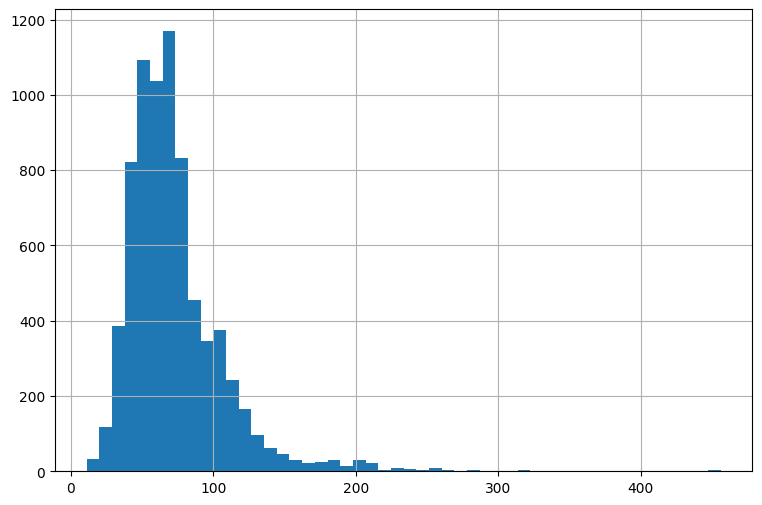

In [20]:
%matplotlib inline
df_s=df_n[['size']]
df_s['size'].hist(bins=50, figsize=(9,6))
plt.show()

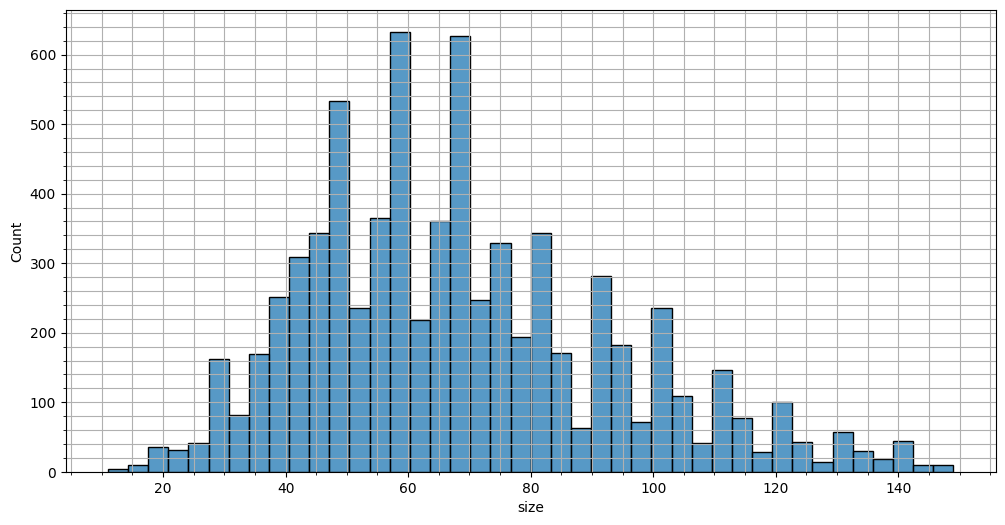

In [21]:
df_sf=df_n[df_n['size']<150]
plt.figure(figsize=(12,6))
sns.histplot(data=df_sf, x='size')
plt.grid(which='both')
plt.minorticks_on()
plt.show()

**Bu grafikdan aksar uylarning maydoni 25 - 100 kv.metr oralig'ida ekanligini ko'rishimiz mumkin.**

# **UYLARNING XONALAR SONI BO'YICHA**

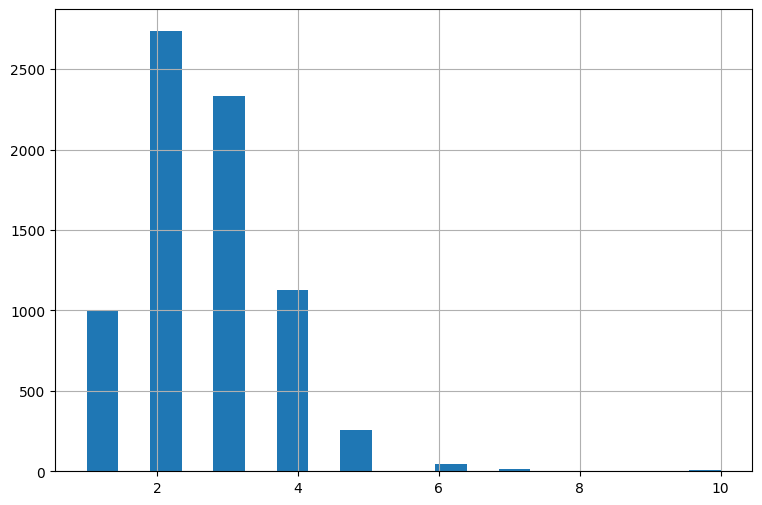

In [22]:
%matplotlib inline
df_r=df_n[['rooms']]
df_r['rooms'].hist(bins=20, figsize=(9,6))
plt.show()

**Uylarning katta qismi 2 xonlidan 4 xonaligacha ekanini ko'rishimiz mumkin.**

# **UY NARXIGA ENG KO'P TASIR QILADIGAN PARAMETRLARNI KO'RIB CHIQAMIZ**

In [23]:
df_1.corrwith(df_1['price']).sort_values(ascending=False)

price         1.000000
size          0.797486
rooms         0.577090
max_levels    0.232806
level         0.065524
dtype: float64

**Bu ro'yxatimizda uylarning maydoni va xonalar soni uy narxini asosiy belgilab beruvchi parametrlar ekanini ko'ramiz.**

# **Bu parametrlarni grafik ko'rinishi**

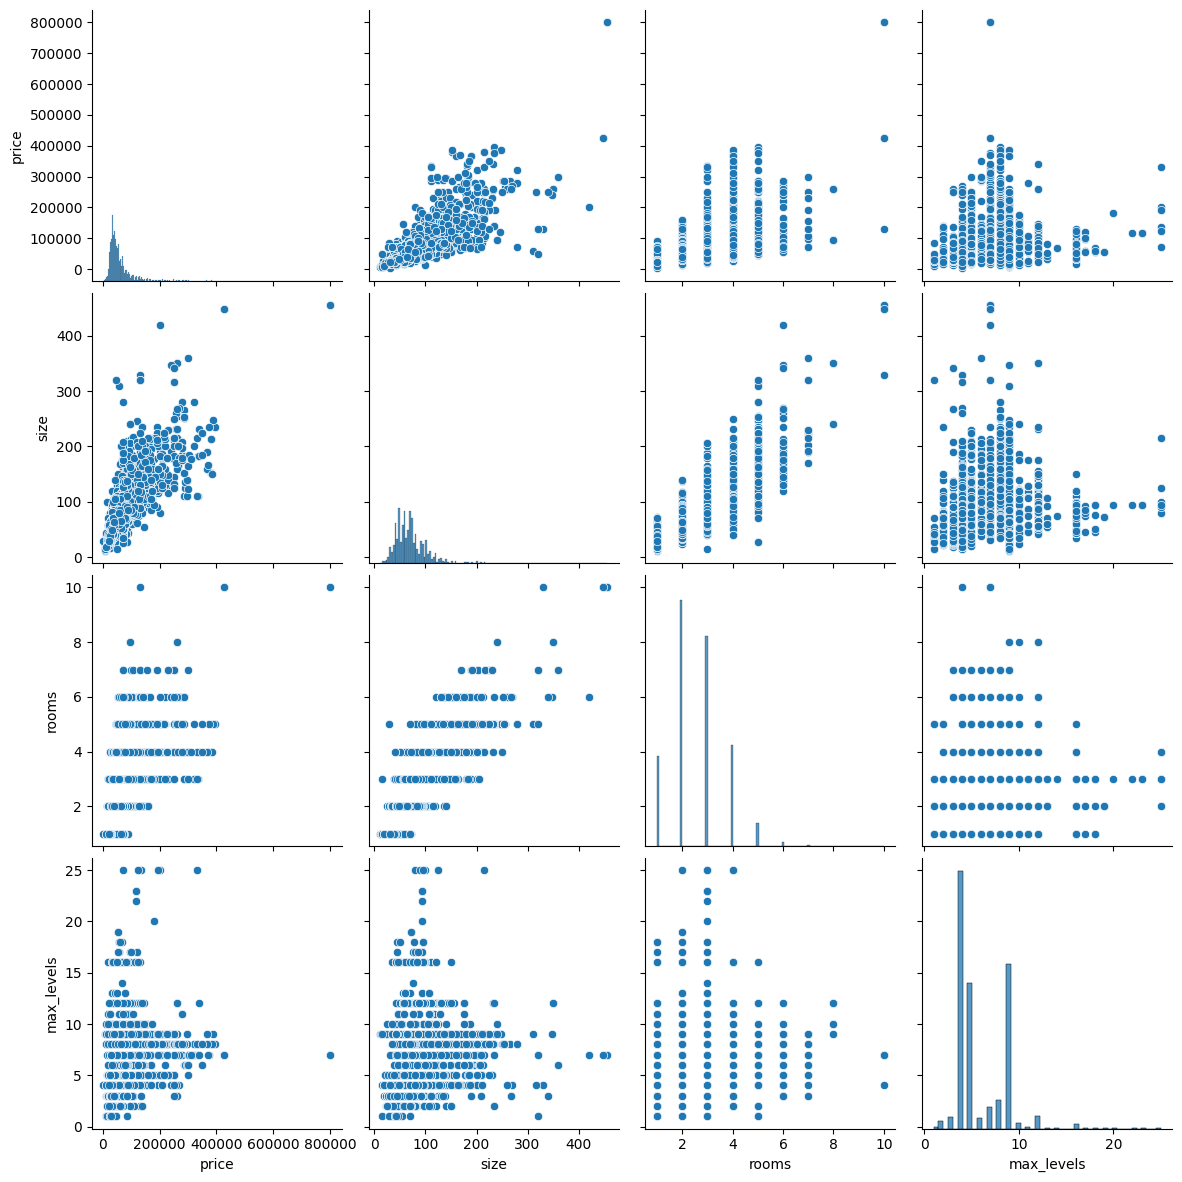

In [24]:
cols = ['price','size','rooms','max_levels']
sns.pairplot(df_1[cols], height=3)
plt.show()

**Grafiklardan ham ko'rinib turibdi. Uy maydonlarining ortishi natijasida uy narxlarining ko'tarilishi kuzatilayabdi. Bu natijani xonalar soni ortishi bilan ham kuzatish mumkin.**

# **Uy narxiga eng katta ta'sir qiluvchi omil bu uy maydonlari ekan. Ushbu grafigimizda bu narsa judaham yaxshi ko'rinib turibdi.**

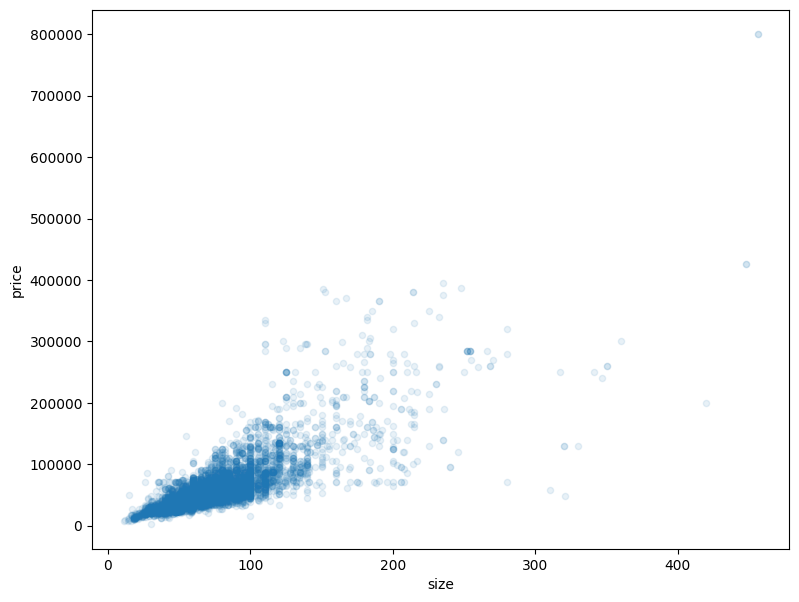

In [25]:
df_n.plot(kind='scatter', x="size", y="price", alpha=0.1, figsize=(9,7))
plt.show()

# **Ma`lumotlarni ML uchun tayyolrash**

In [26]:
df = pd.read_csv('https://raw.githubusercontent.com/anvarnarz/praktikum_datasets/main/housing_data_08-02-2021.csv')
df.head()

,location,district,rooms,size,level,max_levels,price
0,"город Ташкент, Юнусабадский район, Юнусабад 8-...",Юнусабадский,3,57,4,4,52000
1,"город Ташкент, Яккасарайский район, 1-й тупик ...",Яккасарайский,2,52,4,5,56000
2,"город Ташкент, Чиланзарский район, Чиланзар 2-...",Чиланзарский,2,42,4,4,37000
3,"город Ташкент, Чиланзарский район, Чиланзар 9-...",Чиланзарский,3,65,1,4,49500
4,"город Ташкент, Чиланзарский район, площадь Актепа",Чиланзарский,3,70,3,5,55000


In [27]:
from sklearn.base import BaseEstimator, TransformerMixin
size_ix, price_ix = 3, 6

class CombinedAttributesAdder(BaseEstimator, TransformerMixin):
    def __init__(self):
        pass
    def fit(self, X, y=None):
        return self
    def transform(self, X):
        df_n = X.copy()
        df_f = df_n.drop(['location', 'district'], axis=1)
        for col in df_f.columns:
            if df_f[col].dtype == 'object':
                df_n[col] = pd.to_numeric(df_f[col], errors='coerce')
        df_n['price'].fillna((df_n['price'].mean()), inplace=True)
        df_n = df_n.dropna()
        df_n = df_n.drop(df_n[df_n['size']<15][df_n['rooms']>1].index)
        df_n = df_n.drop(df_n[df_n['size']>250][df_n['rooms']<5].index)
        df_n = df_n.drop(df_n[df_n['size']==2100].index)
        df_n = df_n.drop(df_n[df_n['price']<7000][df_n['rooms']>1].index)
        df_n = df_n.drop(df_n[df_n['price']>400000][df_n['rooms']<9].index)
        return df_n

combined_adder = CombinedAttributesAdder()

transformed_data = combined_adder.transform(df)

df_n = transformed_data

<ipython-input-27-43da7e61b343>:17: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_n = df_n.drop(df_n[df_n['size']<15][df_n['rooms']>1].index)
<ipython-input-27-43da7e61b343>:18: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_n = df_n.drop(df_n[df_n['size']>250][df_n['rooms']<5].index)
<ipython-input-27-43da7e61b343>:20: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_n = df_n.drop(df_n[df_n['price']<7000][df_n['rooms']>1].index)
<ipython-input-27-43da7e61b343>:21: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_n = df_n.drop(df_n[df_n['price']>400000][df_n['rooms']<9].index)


In [28]:
from sklearn.model_selection import train_test_split
train_set, test_set = train_test_split(df_n, test_size=0.2, random_state=42)

X_train = train_set.drop("price", axis=1)
y = train_set["price"].copy()

X_num = X_train.drop(["district",'location'], axis=1)

In [29]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OrdinalEncoder, StandardScaler

num_pipeline = Pipeline([
          ('std_scaler', StandardScaler())
])

In [30]:
from sklearn.compose import ColumnTransformer

num_attribs = list(X_num)
cat_attribs = ['district']

full_pipeline = ColumnTransformer([
    ('num', num_pipeline, num_attribs),
    ('cat', OrdinalEncoder(), cat_attribs)
])

In [31]:
X_prepared = full_pipeline.fit_transform(X_train)
X_prepared[0:5,:]

array([[-0.57328086, -0.44149936, -0.31775778, -0.78598222,  9.        ],
       [ 0.35861076,  0.47606394, -1.20488079,  2.27440738,  5.        ],
       [ 0.35861076,  0.89313817, -1.20488079, -0.02088482,  8.        ],
       [-0.57328086, -0.21905977, -0.31775778, -0.78598222,  7.        ],
       [-0.57328086, -0.35808451,  0.56936524, -0.40343352,  2.        ]])

# **Machine Learning**

**LinearRegression**

In [32]:
from sklearn.linear_model import LinearRegression

LR_model = LinearRegression()

In [33]:
LR_model.fit(X_prepared, y)

LinearRegression()

In [34]:
# tasodifiy 5 ta qatorni ajratib olamiz
test_data = X_train.sample(5)
test_data

,location,district,rooms,size,level,max_levels
4576,"город Ташкент, Учтепинский район, Чиланзар 22-...",Учтепинский,1,26.0,1,4
4135,"город Ташкент, Чиланзарский район, Чиланзар-10",Чиланзарский,1,36.0,3,5
6117,"город Ташкент, Мирабадский район, Госпитальный",Мирабадский,4,100.0,6,9
5159,"город Ташкент, Чиланзарский район, Чиланзар 2-...",Чиланзарский,1,30.0,2,4
3050,"город Ташкент, Мирзо-Улугбекский район",Мирзо-Улугбекский,3,72.0,2,4


In [35]:
# yuqoridagi qatorlarga mos keluvchi narxlarni ajratib olamiz (biz aynan shu qiymatlarni bashorat qilishimiz kerak)
test_label = y.loc[test_data.index]
test_label

4576    19000.0
4135    27500.0
6117    70000.0
5159    26500.0
3050    65000.0
Name: price, dtype: float64

In [36]:
test_data_prepared = full_pipeline.transform(test_data)
test_data_prepared

array([[-1.50517248, -1.30345276, -1.20488079, -0.78598222,  5.        ],
       [-1.50517248, -1.02540327, -0.31775778, -0.40343352,  6.        ],
       [ 1.29050237,  0.75411343,  1.01292675,  1.12676128,  1.        ],
       [-1.50517248, -1.19223297, -0.76131929, -0.78598222,  6.        ],
       [ 0.35861076, -0.02442513, -0.76131929, -0.78598222,  2.        ]])

In [37]:
predicted_data = LR_model.predict(test_data_prepared)
predicted_data

array([20120.56504299, 27920.47034614, 81156.39842464, 22027.33251891,
       58549.04415432])

In [38]:
pd.DataFrame({'Prognoz':predicted_data, 'Real baxosi': test_label})

,Prognoz,Real baxosi
4576,20120.565043,19000.0
4135,27920.470346,27500.0
6117,81156.398425,70000.0
5159,22027.332519,26500.0
3050,58549.044154,65000.0


In [39]:
test_set

,location,district,rooms,size,level,max_levels,price
4487,"город Ташкент, Юнусабадский район, Буюк Турон",Юнусабадский,2,57.0,6,9,68000.0
5645,"город Ташкент, Юнусабадский район, Юнусабад 11...",Юнусабадский,1,43.0,2,5,62000.0
4719,"город Ташкент, Мирзо-Улугбекский район, Буз-2 ...",Мирзо-Улугбекский,2,35.0,5,5,32000.0
1060,"город Ташкент, Чиланзарский район, Чиланзар кв...",Чиланзарский,2,49.0,2,4,33500.0
4847,"город Ташкент, Чиланзарский район, Чиланзар кв...",Чиланзарский,2,47.0,2,4,29000.0
...,...,...,...,...,...,...,...
4129,"город Ташкент, Чиланзарский район, Чиланзар-10",Чиланзарский,2,50.0,3,5,34500.0
7237,"город Ташкент, Мирабадский район, Фидокор (Чех...",Мирабадский,3,70.0,2,4,60000.0
2283,"город Ташкент, Мирзо-Улугбекский район, Феруза-1",Мирзо-Улугбекский,1,40.0,1,4,24000.0
2854,"город Ташкент, Мирзо-Улугбекский район, Городо...",Мирзо-Улугбекский,2,45.0,1,4,36000.0


In [40]:
X_test = test_set.drop('price', axis=1)
X_test

,location,district,rooms,size,level,max_levels
4487,"город Ташкент, Юнусабадский район, Буюк Турон",Юнусабадский,2,57.0,6,9
5645,"город Ташкент, Юнусабадский район, Юнусабад 11...",Юнусабадский,1,43.0,2,5
4719,"город Ташкент, Мирзо-Улугбекский район, Буз-2 ...",Мирзо-Улугбекский,2,35.0,5,5
1060,"город Ташкент, Чиланзарский район, Чиланзар кв...",Чиланзарский,2,49.0,2,4
4847,"город Ташкент, Чиланзарский район, Чиланзар кв...",Чиланзарский,2,47.0,2,4
...,...,...,...,...,...,...
4129,"город Ташкент, Чиланзарский район, Чиланзар-10",Чиланзарский,2,50.0,3,5
7237,"город Ташкент, Мирабадский район, Фидокор (Чех...",Мирабадский,3,70.0,2,4
2283,"город Ташкент, Мирзо-Улугбекский район, Феруза-1",Мирзо-Улугбекский,1,40.0,1,4
2854,"город Ташкент, Мирзо-Улугбекский район, Городо...",Мирзо-Улугбекский,2,45.0,1,4


In [41]:
y_test = test_set['price'].copy()
y_test

4487    68000.0
5645    62000.0
4719    32000.0
1060    33500.0
4847    29000.0
         ...   
4129    34500.0
7237    60000.0
2283    24000.0
2854    36000.0
3097    46500.0
Name: price, Length: 1502, dtype: float64

In [42]:
X_test_prepared = full_pipeline.transform(X_test)

In [43]:
y_predicted = LR_model.predict(X_test_prepared)

In [44]:
from sklearn.metrics import mean_squared_error
lin_mse = mean_squared_error(y_test, y_predicted)
# RMSE hisoblaymiz
lin_rmse = np.sqrt(lin_mse)
print(lin_rmse)

22351.162937705867


In [45]:
from sklearn.tree import DecisionTreeRegressor
Tree_model = DecisionTreeRegressor()
Tree_model.fit(X_prepared, y)

DecisionTreeRegressor()

In [46]:
y_predicted = Tree_model.predict(X_test_prepared)

In [47]:
lin_mse = mean_squared_error(y_test, y_predicted)
# RMSE hisoblaymiz
lin_rmse = np.sqrt(lin_mse)
print(lin_rmse)

25971.280585725515


In [48]:
from sklearn.ensemble import RandomForestRegressor
RF_model = RandomForestRegressor()
RF_model.fit(X_prepared, y)

RandomForestRegressor()

In [49]:
y_predicted = RF_model.predict(X_test_prepared)
lin_mse = mean_squared_error(y_test, y_predicted)
# RMSE hisoblaymiz
lin_rmse = np.sqrt(lin_mse)
print(lin_rmse)

19428.953726416785


In [50]:
X = df_n.drop("price", axis=1)
y = df_n["price"].copy()

X_prepared = full_pipeline.transform(X)

In [51]:
X = df_n.drop("price", axis=1)
y = df_n["price"].copy()

X_prepared = full_pipeline.transform(X)

In [52]:
def display_scores(scores):
    print("Scores:", scores)
    print("Mean:", scores.mean())
    print("Std.dev:", scores.std())

In [53]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(LR_model, X_prepared, y, scoring="neg_mean_squared_error", cv=10)
LR_rmse_scores = np.sqrt(-scores)

In [54]:
display_scores(LR_rmse_scores)

Scores: [21700.9554612  18874.26247603 30394.84900944 27486.30894213
 28230.0197357  29444.19205012 28756.62083779 25257.48695511
 22150.60903257 17901.65957226]
Mean: 25019.69640723445
Std.dev: 4319.241130372309


In [55]:
scores = cross_val_score(Tree_model, X_prepared, y, scoring="neg_mean_squared_error", cv=10)
LR_rmse_scores = np.sqrt(-scores)
display_scores(LR_rmse_scores)

Scores: [21469.12642474 21766.76680056 33260.60186222 31373.58253598
 31687.09163073 26240.53233067 28613.00871695 27424.11954943
 24559.04863834 19985.12297309]
Mean: 26637.900146271182
Std.dev: 4421.351896447983


In [56]:
scores = cross_val_score(RF_model, X_prepared, y, scoring="neg_mean_squared_error", cv=10)
LR_rmse_scores = np.sqrt(-scores)
display_scores(LR_rmse_scores)

Scores: [17543.2576111  16798.03840019 26652.7625157  23970.4680085
 22805.7405743  23393.51901023 23228.816765   20876.43772589
 17931.95826191 16022.68040804]
Mean: 20922.36792808558
Std.dev: 3442.118542420432
